In [1]:
import math
import random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

import os
logdir='./DDPG/'
logging_interval = 100
animate_interval = logging_interval * 5

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<h2>Use CUDA</h2>

In [3]:
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")

<h2>Create Environments</h2>

In [4]:
from common.multiprocessing_env import SubprocVecEnv

#num_envs = 16
num_envs = 16
#env_name = "Pendulum-v0"
#env_name = 'HalfCheetah-v1' 
env_name ='HandManipulateBlock-v0'

def make_env():
    def _thunk():
        env = gym.make(env_name)
        return env

    return _thunk

envs = [make_env() for i in range(num_envs)]
envs = SubprocVecEnv(envs)

env = gym.make(env_name)

running build_ext
running build_ext
building 'mujoco_py.cymj' extension
building 'mujoco_py.cymj' extension
gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py -I/home/akanimoh/.mujoco/mjpro150/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/numpy/core/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/vendor/egl -I/home/akanimoh/anaconda3/envs/rlkit-gpu/include/python3.5m -c /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.c -o /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/generated/_pyxbld_1.50.1.56_35_linuxgpuextensionbuilder/temp.linux-x86_64-3.5/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.o -fopenmp -w
gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/si

running build_ext
running build_ext
running build_ext
building 'mujoco_py.cymj' extension
building 'mujoco_py.cymj' extension
gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py -I/home/akanimoh/.mujoco/mjpro150/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/numpy/core/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/vendor/egl -I/home/akanimoh/anaconda3/envs/rlkit-gpu/include/python3.5m -c /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.c -o /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/generated/_pyxbld_1.50.1.56_35_linuxgpuextensionbuilder/temp.linux-x86_64-3.5/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.o -fopenmp -w
gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gp

Process Process-5:


building 'mujoco_py.cymj' extension


Traceback (most recent call last):
Process Process-9:
Process Process-3:
Process Process-2:
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
Process Process-14:


gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py -I/home/akanimoh/.mujoco/mjpro150/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/numpy/core/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/vendor/egl -I/home/akanimoh/anaconda3/envs/rlkit-gpu/include/python3.5m -c /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.c -o /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/generated/_pyxbld_1.50.1.56_35_linuxgpuextensionbuilder/temp.linux-x86_64-3.5/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.o -fopenmp -w


Process Process-1:
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 909, in spawn
    spawn(cmd, dry_run=self.dry_run)


running build_ext


Traceback (most recent call last):
Process Process-8:
Process Process-7:
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 36, in spawn
    _spawn_posix(cmd, search_path, dry_run=dry_run)
Traceback (most recent call last):
Traceback (most recent call last):


building 'mujoco_py.cymj' extension


  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 909, in spawn
    spawn(cmd, dry_run=self.dry_run)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-6:
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 159, in _spawn_posix
    % (cmd, exit_status))
Process Process-4:
distutils.errors.DistutilsExecError: command 'gcc' failed with exit status 1

During handling of the above exception, another exception occurred:



gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py -I/home/akanimoh/.mujoco/mjpro150/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/numpy/core/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/vendor/egl -I/home/akanimoh/anaconda3/envs/rlkit-gpu/include/python3.5m -c /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.c -o /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/generated/_pyxbld_1.50.1.56_35_linuxgpuextensionbuilder/temp.linux-x86_64-3.5/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.o -fopenmp -w


Traceback (most recent call last):
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 909, in spawn
    spawn(cmd, dry_run=self.dry_run)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
Traceback (most recent call last):
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 909, in spawn
    spawn(cmd, dry_run=self.dry_run)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 36, in spawn
    _spawn_posix(cmd, search_path, dry_run=dry_run)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
  File "/home/akanimoh

running build_ext


  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 159, in _spawn_posix
    % (cmd, exit_status))
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 36, in spawn
    _spawn_posix(cmd, search_path, dry_run=dry_run)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 159, in _spawn_posix
    % (cmd, exit_status))
  File "<ipython-input-4-fac5450c10d0>", line 11, in _thunk
    env = gym.make(env_name)

During handling of the above exception, another exception occurred:

distutils.errors.DistutilsExecError: command 'gcc' failed with exit status 1
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/spawn.py", line 159, in _spawn_posix
    % (cmd, exit_status))
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)
distutils.errors.DistutilsExecError: command 'gcc' faile

building 'mujoco_py.cymj' extension



During handling of the above exception, another exception occurred:

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/unixccompiler.py", line 118, in _compile
    extra_postargs)
distutils.errors.DistutilsExecError: command 'gcc' failed with exit status 1
Traceback (most recent call last):


gcc -pthread -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -fPIC -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py -I/home/akanimoh/.mujoco/mjpro150/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/numpy/core/include -I/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/vendor/egl -I/home/akanimoh/anaconda3/envs/rlkit-gpu/include/python3.5m -c /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.c -o /home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/generated/_pyxbld_1.50.1.56_35_linuxgpuextensionbuilder/temp.linux-x86_64-3.5/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/cymj.o -fopenmp -w


  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 909, in spawn
    spawn(cmd, dry_run=self.dry_run)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)

During handling of the above exception, another exception occurred:

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/akanimoh/anaconda3/

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/__init__.py", line 1, in <module>
    from gym.envs.robotics.fetch_env import FetchEnv
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException
Traceback (most recent call last):
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/pkg_resources/__init__.py", line 2322, in load
    return self.resolve()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/fetch_env.py", line 3, in <module>
    from gym.envs.robotics import rotations, robot_env, utils
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py",

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/pkg_resources/__init__.py", line 2322, in load
    return self.resolve()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 85, in make
    cls = load(self._entry_point)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/fetch_env.py", line 3, in <module>
    from gym.envs.robotics import rotations, robot_env, utils
  File "<ipython-input-4-fac5450c10d0>", line 11, in _thunk
    env = gym.make(env_name)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/multiprocessing/process.py", line 93, in run

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/pkg_resources/__init__.py", line 2328, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/__init__.py", line 1, in <module>
    from gym.envs.robotics.fetch_env import FetchEnv
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/__init__.py", line 1, in <module>
    from gym.envs.robotics.fetch_env import FetchEnv
  File "<ipython-input-4-fac5450c10d0>", line 11, in _thunk
    env = gym.make(env_name)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 167, in make
    return registry.make(id)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/fetch_env.py", line 3, in <module>
    from gym.envs.robotics import rotations, robot_env, utils
  File "

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 468, in <module>
    cymj = load_cython_ext(mjpro_path)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/command/build_ext.py", line 532, in build_extension
    depends=ext.depends)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 468, in <module>
    cymj = load_cython_ext(mjpro_path)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 574, in compile
    self._compile(obj, src, ext, cc_args, extra_postargs, pp_opts)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 90, in load_cython_ext
    cext_so_path = builder.build()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 202, in build
    built_so_file_path = self._build_impl()
  File "/home/akanimoh/anaconda3

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/dist.py", line 955, in run_commands
    self.run_command(cmd)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 202, in build
    built_so_file_path = self._build_impl()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 225, in _build_impl
    dist.run_commands()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 225, in _build_impl
    dist.run_commands()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotics/robot_env.py", line 10, in <module>
    import mujoco_py
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 274, in _build_impl
    so_file_path = super()._build_impl()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/robotic

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 202, in build
    built_so_file_path = self._build_impl()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 125, in build_extensions
    build_ext.build_extensions(self)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 574, in compile
    self._compile(obj, src, ext, cc_args, extra_postargs, pp_opts)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py", line 194, in build_extensions
    self.build_extension(ext)
  File "<ipython-input-4-fac5450c10d0>", line 11, in _thunk
    env = gym.make(env_name)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 274, in _build_impl
    so_file_path = super()._build_impl()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-pack

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/dist.py", line 974, in run_command
    cmd_obj.run()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 468, in <module>
    cymj = load_cython_ext(mjpro_path)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py", line 186, in run
    _build_ext.build_ext.run(self)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 14, in load
    result = entry_point.load(False)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/command/build_ext.py", line 532, in build_extension
    depends=ext.depends)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/command/build_ext.py", line 338, in run
    self.build_extensions()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 574, in compi

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/dist.py", line 955, in run_commands
    self.run_command(cmd)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 225, in _build_impl
    dist.run_commands()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/gym/envs/registration.py", line 119, in make
    env = spec.make()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/dist.py", line 974, in run_command
    cmd_obj.run()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/ccompiler.py", line 574, in compile
    self._compile(obj, src, ext, cc_args, extra_postargs, pp_opts)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/__init__.py", line 1, in <module>
    from mujoco_py.builder import cymj, ignore_mujoco_warnings, functions, MujocoException
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/si

  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/dist.py", line 974, in run_command
    cmd_obj.run()
distutils.errors.CompileError: command 'gcc' failed with exit status 1
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py", line 186, in run
    _build_ext.build_ext.run(self)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/command/build_ext.py", line 338, in run
    self.build_extensions()
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/mujoco_py/builder.py", line 125, in build_extensions
    build_ext.build_extensions(self)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py", line 194, in build_extensions
    self.build_extension(ext)
  File "/home/akanimoh/anaconda3/envs/rlkit-gpu/lib/python3.5/distutils/command/build_ext.py", line 532, in build_extension
    depends=ext.depends)
  File "/home

ConnectionResetError: [Errno 104] Connection reset by peer

In [23]:
VISUALIZE = True
SEED = 0 
MAX_PATH_LENGTH = 500 
NUM_EPISODES = 12000
if VISUALIZE:
    if not os.path.exists(logdir):
        os.mkdir(logdir)
    env = gym.wrappers.Monitor(env, logdir, force=True, video_callable=lambda episode_id: episode_id%logging_interval==0)

#Need to look through code more before setting this. 
#env._max_episode_steps = MAX_PATH_LENGTH


[2018-05-29 14:49:34,000] Clearing 2 monitor files from previous run (because force=True was provided)


<h2>Neural Network</h2>

In [24]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0., std=0.1)
        nn.init.constant_(m.bias, 0.1)


class ActorCritic(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_size, std=0.0):
        super(ActorCritic, self).__init__()
        
        self.critic = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )
        
        self.actor = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_outputs),
        )
        self.log_std = nn.Parameter(torch.ones(1, num_outputs) * std)
        
        self.apply(init_weights)
        
    def forward(self, x):
        value = self.critic(x)
        mu    = self.actor(x)
        std   = self.log_std.exp().expand_as(mu)
        dist  = Normal(mu, std)
        return dist, value

In [25]:
def plot(frame_idx, rewards):
    clear_output(True)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title('frame %s. reward: %s' % (frame_idx, rewards[-1]))
    plt.plot(rewards)
    plt.show()
    
def test_env(vis=False):
    state = env.reset()
    if vis: env.render()
    done = False
    total_reward = 0
    while not done:
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        dist, _ = model(state)
        next_state, reward, done, _ = env.step(dist.sample().cpu().numpy()[0])
        state = next_state
        if vis: env.render()
        total_reward += reward
    return total_reward

<h1>High-Dimensional Continuous Control Using Generalized Advantage Estimation</h1>
<h3><a href="https://arxiv.org/abs/1506.02438">Arxiv</a></h3>

In [26]:
def compute_gae(next_value, rewards, masks, values, gamma=0.99, tau=0.95):
    values = values + [next_value]
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + gamma * values[step + 1] * masks[step] - values[step]
        gae = delta + gamma * tau * masks[step] * gae
        returns.insert(0, gae + values[step])
    return returns

In [27]:
num_inputs  = envs.observation_space.shape[0]
num_outputs = envs.action_space.shape[0]

#Hyper params:
hidden_size = 256
lr          = 3e-4
num_steps   = 20

model = ActorCritic(num_inputs, num_outputs, hidden_size).to(device)
optimizer = optim.Adam(model.parameters())

In [28]:
max_frames   = 100000
frame_idx    = 0
test_rewards = []

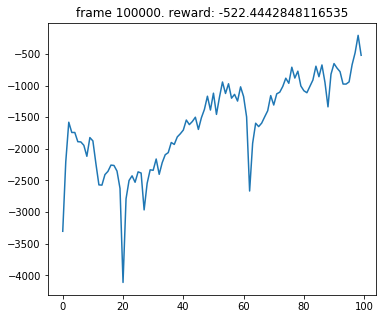

In [29]:
state = envs.reset()

while frame_idx < max_frames:

    log_probs = []
    values    = []
    rewards   = []
    masks     = []
    entropy = 0

    for _ in range(num_steps):
        state = torch.FloatTensor(state).to(device)
        dist, value = model(state)

        action = dist.sample()
        next_state, reward, done, _ = envs.step(action.cpu().numpy())

        log_prob = dist.log_prob(action)
        entropy += dist.entropy().mean()
        
        log_probs.append(log_prob)
        values.append(value)
        rewards.append(torch.FloatTensor(reward).unsqueeze(1).to(device))
        masks.append(torch.FloatTensor(1 - done).unsqueeze(1).to(device))
        
        state = next_state
        frame_idx += 1
        
        if frame_idx % 1000 == 0:
            test_rewards.append(np.mean([test_env() for _ in range(10)]))
            plot(frame_idx, test_rewards)
            
    next_state = torch.FloatTensor(next_state).to(device)
    _, next_value = model(next_state)
    returns = compute_gae(next_value, rewards, masks, values)
    
    log_probs = torch.cat(log_probs)
    returns   = torch.cat(returns).detach()
    values    = torch.cat(values)

    advantage = returns - values

    actor_loss  = -(log_probs * advantage.detach()).mean()
    critic_loss = advantage.pow(2).mean()

    loss = actor_loss + 0.5 * critic_loss - 0.001 * entropy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [30]:
test_env(True)

[2018-05-29 15:05:13,083] Starting new video recorder writing to /datasets/home/52/452/ee276cbb/Hwk4/Courses_Repo18-20/Reinforcement_learning18/RL-Adventure-2/DDPG/openaigym.video.2.907.video001000.mp4


-596.06440737957